# Lab 2 Exercises for COMP 433 (Deep Learning)

## Exercise 1: Data Visualization and Multi-Class Classification


In this exercise, we will work with a dataset called [wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html) which has 3 categories and 178 samples. For each sample there are 13 features.

Start by running the cell below.

In [1]:
#Load sklearn data
from sklearn.datasets import load_wine
data = load_wine()
X, y = load_wine(return_X_y=True)
#targets for each sample
print(data.target.shape)
# data
print(data.data.shape)

/Users/nazliensafi/opt/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(178,)
(178, 13)


Class distribution refers to the number of examples that belong to each class.

We'll plot the class distribution at various points in the lab. Complete the following function. We'll be using this function at various points in the lab.

Class Distribution for targets:


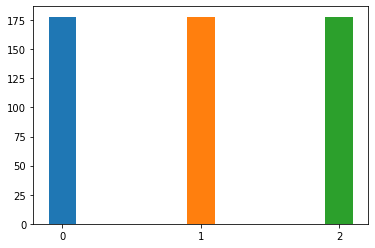

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def plot_class_distribution(targets, name):
  plt.figure()
  width = 0.2
  for i in range(0, 3):
    # use logical 🤓 indexing on targets
    plt.bar(i, np.shape(targets), width)
  plt.xticks([0, 1, 2])
  print('Class Distribution for {n}:'.format(n =name))
    
  plt.show()

plot_class_distribution(data.target, 'targets')

### A modified version of the plot_class_distribution function:

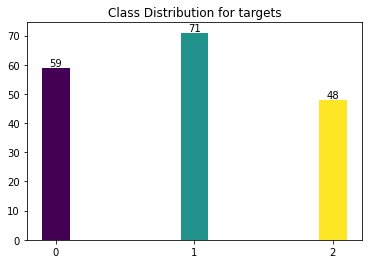

In [21]:
def plot_class_distribution_2(targets, name):
    plt.figure()
    width = 0.2
    unique_classes, class_counts = np.unique(targets, return_counts=True)
    
    color_map = plt.get_cmap('viridis')
    
    plt.bar(unique_classes, class_counts, width, color=color_map(np.linspace(0, 1, len(unique_classes))))
    plt.xticks(unique_classes)
    
    plt.title(f'Class Distribution for {name}')
    
    # Annotate each bar with its count
    for i, count in enumerate(class_counts):
        plt.text(unique_classes[i], count, str(count), ha='center', va='bottom')

    plt.show()


plot_class_distribution_2(data.target, 'targets')



 Pick any **two** models from the list of sklearn models below:

 *   [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

*   [Ridge Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html)

*   [Random Forset Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Do not worry if we have not covered this algorithm in class, the goal is to get familiar with applying ML algorithms in sklearn.

----
Requirements:

1. First start by **splitting** your data into two sets: train and test using the 80/20 split rule. Utilize [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
2. **Train** your 2 models of choice using the train set. Make sure to set the appropriate hyperparameters for each model.
3. **Evaluate** your trained models on both the train and test data by getting the accuracy on both the training and test sets. Utilize [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

Note: For reproducibility fix the random_state=42.
Your test accuracy should be >90%



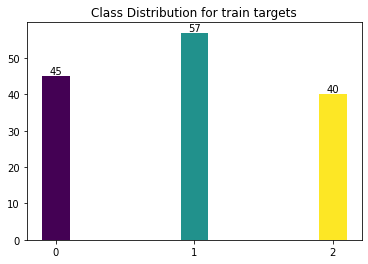

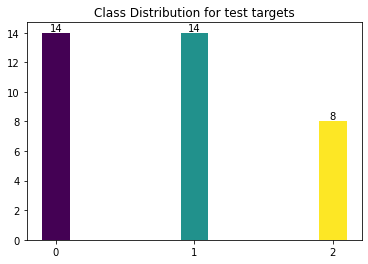

In [23]:
from sklearn.model_selection import train_test_split

#Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Visualize the class distribution of train and test
plot_class_distribution_2(y_train, 'train targets')
plot_class_distribution_2(y_test, 'test targets')

In [25]:
#Train and evaluate accuracy with 2 different models

#1 Logistic Regression
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression(random_state=42,solver='liblinear', max_iter=500).fit(X_train, y_train)
# note: default solver (solver='lbfgs') failed to converge 

# returns the mean accuracy
print("Mean Accuracy of the Logistic Regression Model: ")
LR_clf.score(X_test, y_test)


Mean Accuracy of the Logistic Regression Model: 


0.9722222222222222

In [26]:
#2 Ridge Classifier
from sklearn.linear_model import RidgeClassifier
R_clf = RidgeClassifier().fit(X_train, y_train)
print("Mean Accuracy of the Ridge Model: ")
R_clf.score(X_test, y_test)


Mean Accuracy of the Ridge Model: 


1.0

Plot the class distributions of the fitted models.

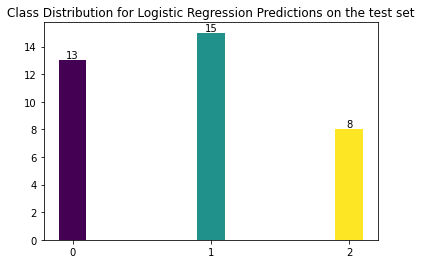

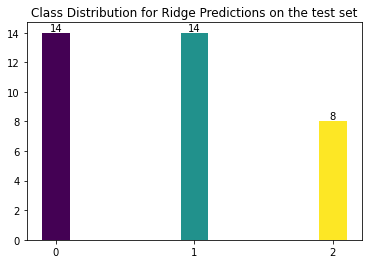

In [27]:
#Visualize the class distributions of the trained models on some data
# Make predictions on the test sets
LR_preds = LR_clf.predict(X_test)
plot_class_distribution_2(LR_preds, 'Logistic Regression Predictions on the test set')

R_preds = R_clf.predict(X_test)
plot_class_distribution_2(R_preds, 'Ridge Predictions on the test set')

Does it look like your trained models match the class distributions of your training data? What about test data?

Explain.

Class distribution for the Logistic Regression predictions on the test set has the same pattern as the class distribution for the tain targets , whereas the class distribution for the Ridge predictions on the test set matches the class distribution for the test targets.

### Exercise 2:
# **Hyperparameter tuning**

Hyperparameter tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. Hyperparameters refer to a set of parameters whose values are chosen by the machine learning practitioner and unchanged by the learning algorithm, while parameters refer to a set of values changed by the learning algorithm.


Hyperparameter tuning methods, such as GridSearch, iterate over a set of values for each hyperparameter and evaluates models trained with these values on a validation set. Loss is often the metric looked at for models with the best fit, but accuracy can also be used.

Once the best set of values for hyperparameters has been found for a particular model, the model is trained on the full training set and then evaluated on the test set.


In this exercise, you will implement a grid search over the hyperparameter `C` of a LogisticRegression model.

1. Define `C_values = [0.1, 0.4, 1.0, 10]` and split the training set from the previous exercise into a train and validation set using `train_test_split`, you can take 20% of the train set for validation.
2. Utilize a for loop to iterate over the values of `C_values`, and define a LogisticRegression model with `C=C_values[index]`.
3. Train the model and evaluate the cross entropy loss or accuracy on the validation set.
4. Choose the best performing model and perform training on the full train set, with evaluation on the test set.

In [38]:
# Define the values of C to iterate over
C_values = [0.1, 0.4, 1.0, 10]
#Define an array to hold the results of the hyp_tuning() function
best = []

def hyp_tuning(C_values, X_train, y_train):
    #SPLIT DATASET
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, train_size=0.8, random_state=42)
    
    # Initialize variables to keep track of the best C and corresponding score
    best_C = None
    best_score = 0
    results = []
    
    # Iterate over the values of C
    for C in C_values:
        #INSTANTIATE SKLEARN MODEL WITH C_VALUE
        clf = LogisticRegression(solver='liblinear', C=C)

        #CALL .FIT FUNCTION
        clf.fit(X_train, y_train)

        #EVALUATE WITH VALIDATION DATASET
        mean_score = clf.score(X_validation, y_validation)

        # Check if the current model is better than the previous best
        if mean_score > best_score:
            best_C = C
            best_score = mean_score
    results = [best_C, best_score]
   
    return results

best = hyp_tuning(C_values, X_train, y_train)
#Print the best C and corresponding score
print("Best C:", best[0])
print("Best accuracy score:", best[1])

Best C: 0.1
Best accuracy score: 0.9655172413793104


## Exercise 3: KNN implementation


In this exercise, we will implement the K Nearest Neighbor algorithm on the MNIST and the CIFAR-10 datasets

### Data understanding and visualization

In [39]:
import os
import torch
from torchvision.datasets import CIFAR10

#Inspect and understand the following functions
def _extract_tensors(dataset, num=None):
  """
  Extract the data and labels from a CIFAR10 dataset object and convert them to tensors.

  Input:
  - dset: A torchvision.datasets.CIFAR10 object
  - num: Optional. If provided, the number of samples to keep.

  Returns:
  - x: float32 tensor of shape (N, 3, 32, 32)
  - y: int64 tensor of shape (N,)
  """
  x = torch.tensor(dataset.data, dtype=torch.float32).permute(0, 3, 1, 2).div_(255)
  y = torch.tensor(dataset.targets, dtype=torch.int64)
  if num is not None:
    if num <= 0 or num > x.shape[0]:
      raise ValueError('Invalid value num=%d; must be in the range [0, %d]'
                       % (num, x.shape[0]))
    x = x[:num].clone()
    y = y[:num].clone()
  return x, y


def cifar10(num_train=None, num_test=None):
  """
  Return the CIFAR10 dataset, automatically downloading it if necessary. This function can also subsample the dataset.

  Inputs:
  - num_train: [Optional] How many samples to keep from the training set.
    If not provided, then keep the entire training set.
  - num_test: [Optional] How many samples to keep from the test set.
    If not provided, then keep the entire test set.

  Returns:
  - x_train: float32 tensor of shape (num_train, 3, 32, 32)
  - y_train: int64 tensor of shape (num_train, 3, 32, 32)
  - x_test: float32 tensor of shape (num_test, 3, 32, 32)
  - y_test: int64 tensor of shape (num_test, 3, 32, 32)
  """
  download = not os.path.isdir('cifar-10-batches-py')
  dset_train = CIFAR10(root='.', download=download, train=True)
  dset_test = CIFAR10(root='.', train=False)
  x_train, y_train = _extract_tensors(dset_train, num_train)
  x_test, y_test = _extract_tensors(dset_test, num_test)

  return x_train, y_train, x_test, y_test

In [44]:
N = 1000
p = .4


X_train, y_train, X_test, y_test = cifar10(N, int(p*N))


In [42]:
# Write the code to show the shape of training and testing data
print("Shape of training set is: \n")
X_train.shape

Shape of training set is: 



torch.Size([1000, 3, 32, 32])

In [43]:
print("Shape of testing set is: \n")
X_test.shape

Shape of testing set is: 



torch.Size([400, 3, 32, 32])

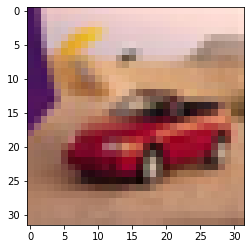

In [51]:
# Choose a random index to select a random image
import random
random_index = random.randint(0, N - 1)

# Get the image data at the random index
random_image = X_train[random_index]

# Convert the PyTorch tensor to a NumPy array and transpose the dimensions for it to be  Matplotlib friendly
random_image = random_image.permute(1, 2, 0).cpu().numpy()

# Display the random image
plt.imshow(random_image)
plt.show()


### Writing distance functions

In [ ]:
def compute_distances_one_loop(x_train, x_test):
  """
  Computes the squared Euclidean distance between each element of the training set and each element of the test set. Images should be flattened and treated as vectors.
  Your implementation should only use a single loop over the training data. Inputs should not be modified.

  NOTE: Your implementation may not use `torch.norm`, `torch.dist`, `torch.cdist`, or their instance method variants x.norm / x.dist / x.cdist. You may not use any functions from torch.nn or torch.nn.functional.

  Inputs:
  - x_train: Torch tensor of shape (num_train, D1, D2, ...)
  - x_test: Torch tensor of shape (num_test, D1, D2, ...)

  Returns:
  - dists: Torch tensor of shape (num_train, num_test) where dists[i, j] is the squared Euclidean distance between the ith training point and the jth test point.
  """

  # Initialize dists to be a tensor of shape (num_train, num_test) with the
  # same datatype and device as x_train
  num_train = x_train.shape[0]
  num_test = x_test.shape[0]
  dists = x_train.new_zeros(num_train, num_test)
  ##############################################################################
  # TODO: Implement this function using only a single loop over x_train.       #
  #                                                                            #
  # You may not use torch.norm (or its instance method variant), nor any       #
  # functions from torch.nn or torch.nn.functional.                            #
  ##############################################################################
  # Replace "pass" statement with your code
  pass
  ##############################################################################
  #                             END OF YOUR CODE                               #
  ##############################################################################
  return dists


def compute_distances_no_loops(x_train, x_test):
  """
  Computes the squared Euclidean distance between each element of the training set and each element of the test set. Images should be flattened and treated as vectors.

  This implementation should not use any Python loops. For memory-efficiency, it also should not create any large intermediate tensors; in particular you should not create any intermediate tensors with O(num_train*num_test) elements.
  Similar to compute_distances_two_loops, this should be able to handle inputs with any number of dimensions. The inputs should not be modified.

  NOTE: Your implementation may not use `torch.norm`, `torch.dist`, `torch.cdist`, or their instance method variants x.norm / x.dist / x.cdist. You may not use any functions from torch.nn or torch.nn.functional.

  Inputs:
  - x_train: Torch tensor of shape (num_train, C, H, W)
  - x_test: Torch tensor of shape (num_test, C, H, W)

  Returns:
  - dists: Torch tensor of shape (num_train, num_test) where dists[i, j] is the squared Euclidean distance between the ith training point and the jth test point.
  """

  # Initialize dists to be a tensor of shape (num_train, num_test) with the  same datatype and device as x_train
  num_train = x_train.shape[0]
  num_test = x_test.shape[0]
  dists = x_train.new_zeros(num_train, num_test)
  ##############################################################################
  # TODO: Implement this function without using any explicit loops and without #
  # creating any intermediate tensors with O(num_train * num_test) elements.   #
  #                                                                            #
  # You may not use torch.norm (or its instance method variant), nor any       #
  # functions from torch.nn or torch.nn.functional.                            #
  #                                                                            #
  # HINT: Try to formulate the Euclidean distance using two broadcast sums     #
  #       and a matrix multiply.                                               #
  ##############################################################################
  # Replace "pass" statement with your code
  pass
  ##############################################################################
  #                             END OF YOUR CODE                               #
  ##############################################################################
  return dists




### Testing the distance functions

In [ ]:
# Write the code to test the previous functions, compare their results (absolute difference) and their computational time, use the two following random data. Use the "time" librairy to compute the computational time

x_train_rand = torch.randn(100, 3, 16, 16, dtype=torch.float64)
x_test_rand = torch.randn(100, 3, 16, 16, dtype=torch.float64)

#Your code here

### Writing the KNN classifier

In [ ]:
class KnnClassifier:
  def __init__(self, x_train, y_train):
    """
    Create a new K-Nearest Neighbor classifier with the specified training data.
    In the initializer we simply memorize the provided training data.

    Inputs:
    - x_train: Torch tensor of shape (num_train, C, H, W) giving training data
    - y_train: int64 torch tensor of shape (num_train,) giving training labels
    """
    ###########################################################################
    # TODO: Implement the initializer for this class. It should perform no    #
    # computation and simply memorize the training data.                      #
    ###########################################################################
    # Replace "pass" statement with your code
    pass
    ###########################################################################
    #                           END OF YOUR CODE                              #
    ###########################################################################

  def predict(self, x_test, k=1):
    """
    Make predictions using the classifier.

    Inputs:
    - x_test: Torch tensor of shape (num_test, C, H, W) giving test samples
    - k: The number of neighbors to use for predictions

    Returns:
    - y_test_pred: Torch tensor of shape (num_test,) giving predicted labels
      for the test samples.
    """
    y_test_pred = None
    ###########################################################################
    # TODO: Implement this method. You should use the functions you wrote     #
    # above for computing distances (use the no-loop variant) and to predict  #
    # output labels.
    ###########################################################################
    # Replace "pass" statement with your code
    pass
    ###########################################################################
    #                           END OF YOUR CODE                              #
    ###########################################################################
    return y_test_pred

  def check_accuracy(self, x_test, y_test, k=1, quiet=False):
    """
    Utility method for checking the accuracy of this classifier on test data.
    Returns the accuracy of the classifier on the test data, and also prints a
    message giving the accuracy.

    Inputs:
    - x_test: Torch tensor of shape (num_test, C, H, W) giving test samples
    - y_test: int64 torch tensor of shape (num_test,) giving test labels
    - k: The number of neighbors to use for prediction
    - quiet: If True, don't print a message.

    Returns:
    - accuracy: Accuracy of this classifier on the test data, as a percent.
      Python float in the range [0, 100]
    """
    y_test_pred = self.predict(x_test, k=k)
    num_samples = x_test.shape[0]
    num_correct = (y_test == y_test_pred).sum().item()
    accuracy = 100.0 * num_correct / num_samples
    msg = (f'Got {num_correct} / {num_samples} correct; '
           f'accuracy is {accuracy:.2f}%')
    if not quiet:
      print(msg)
    return accuracy

### Testing the KNN Classifier

In [ ]:
# Read again the training and testing data

N = 5000
p = .2


X_train, y_train, X_test, y_test = cifar10(N, int(p*N))


classifier = KnnClassifier(X_train, y_train)

#check the accuracy
classifier.check_accuracy(X_test, y_test, k=1)

### Hold-out validation

In [ ]:
torch.manual_seed(111)
# Split the training data into training and validation set (75-25), 75% for training and 25% for validation, randomly sample train and validation indexes without repetition

# Create several KNN classifier by variying K (up to 10), evaluate their accuracy on the validation set

# Plot the curve accuracy vs value of K

# Print the best value of K





In [ ]:
### Final model

#Compute the accuracy on testing data for the optimal K obtained after hold-out validation